<a href="https://colab.research.google.com/github/mariahelenass/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Componentes Principais (PCA)

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('imrs.csv')

In [6]:
df.head()

,ibge7,meso,nome_meso,micro,nome_micro,mun,tx_mort_acid_15_29,tx_mort_hom_15_29,tx_mort_mama,tx_mort_inf,...,rdpc,renocup,perc_rdpc_140,fam_pbf,tx_emp_form,rend_pc_form,pib_pc,perc_agro,perc_serv,tx_ativ_18m
0,3100104,3105,Triângulo Mineiro/Alto Paranaíba,31019,Patrocínio,Abadia dos Dourados,66.53,0.00,0.00,0.00,...,596.18,920.10,7.94,589,22.9,114.28,11744.69,37.90,26.86,65.97
1,3100203,3106,Central Mineira,31024,Três Marias,Abaeté,56.22,0.00,8.73,27.27,...,707.24,930.85,6.69,1428,27.5,172.19,11466.39,22.08,40.06,65.90
2,3100302,3112,Zona da Mata,31061,Manhuaçu,Abre Campo,30.90,0.00,0.00,27.21,...,444.32,685.72,23.33,1293,20.1,117.72,7998.32,45.80,31.92,63.80
3,3100401,3112,Zona da Mata,31060,Ponte Nova,Acaiaca,0.00,0.00,0.00,20.83,...,357.03,646.71,26.53,389,11.7,61.49,6049.45,25.16,41.87,57.71
4,3100500,3108,Vale do Rio Doce,31039,Ipatinga,Açucena,0.00,34.13,0.00,19.61,...,325.42,514.60,30.70,1172,10.3,52.78,5603.93,41.22,29.89,54.21


In [7]:
df.columns

Index(['ibge7', 'meso', 'nome_meso', 'micro', 'nome_micro', 'mun',
       'tx_mort_acid_15_29', 'tx_mort_hom_15_29', 'tx_mort_mama',
       'tx_mort_inf', 'existe_conselho_saude', 'tx_analf_25m', 'prop_fund_25m',
       'perc_med_25m', 'tx_med_adeq', 'tx_med_lab', 'existe_conselho_educ',
       'tx_crimes_pat', 'tx_crimes_pes', 'tx_hom', 'existe_uni_infra',
       'perc_energia', 'perc_banagua', 'perc_esgoto', 'perc_lixo', 'pop_total',
       'pop_masc', 'pop_fem', 'raz_dep', 'tx_urb', 'tx_fec', 'esp_vida',
       'rdpc', 'renocup', 'perc_rdpc_140', 'fam_pbf', 'tx_emp_form',
       'rend_pc_form', 'pib_pc', 'perc_agro', 'perc_serv', 'tx_ativ_18m'],
      dtype='object')

In [8]:
df.shape

(853, 42)

In [9]:
colunas = []

In [10]:
# recorte do dataset para as variaveis 'rdpc', 'renocup', 'fam_pbf', 'tx_emp_form', 'rend_pc_form', 'pop_total'
colunas = ['rdpc', 'renocup', 'fam_pbf', 'tx_emp_form', 'rend_pc_form', 'pop_total']
df2 = df[colunas]

In [11]:
df2.head()

,rdpc,renocup,fam_pbf,tx_emp_form,rend_pc_form,pop_total
0,596.18,920.10,589,22.9,114.28,6704
1,707.24,930.85,1428,27.5,172.19,22700
2,444.32,685.72,1293,20.1,117.72,13311
3,357.03,646.71,389,11.7,61.49,3924
4,325.42,514.60,1172,10.3,52.78,10298


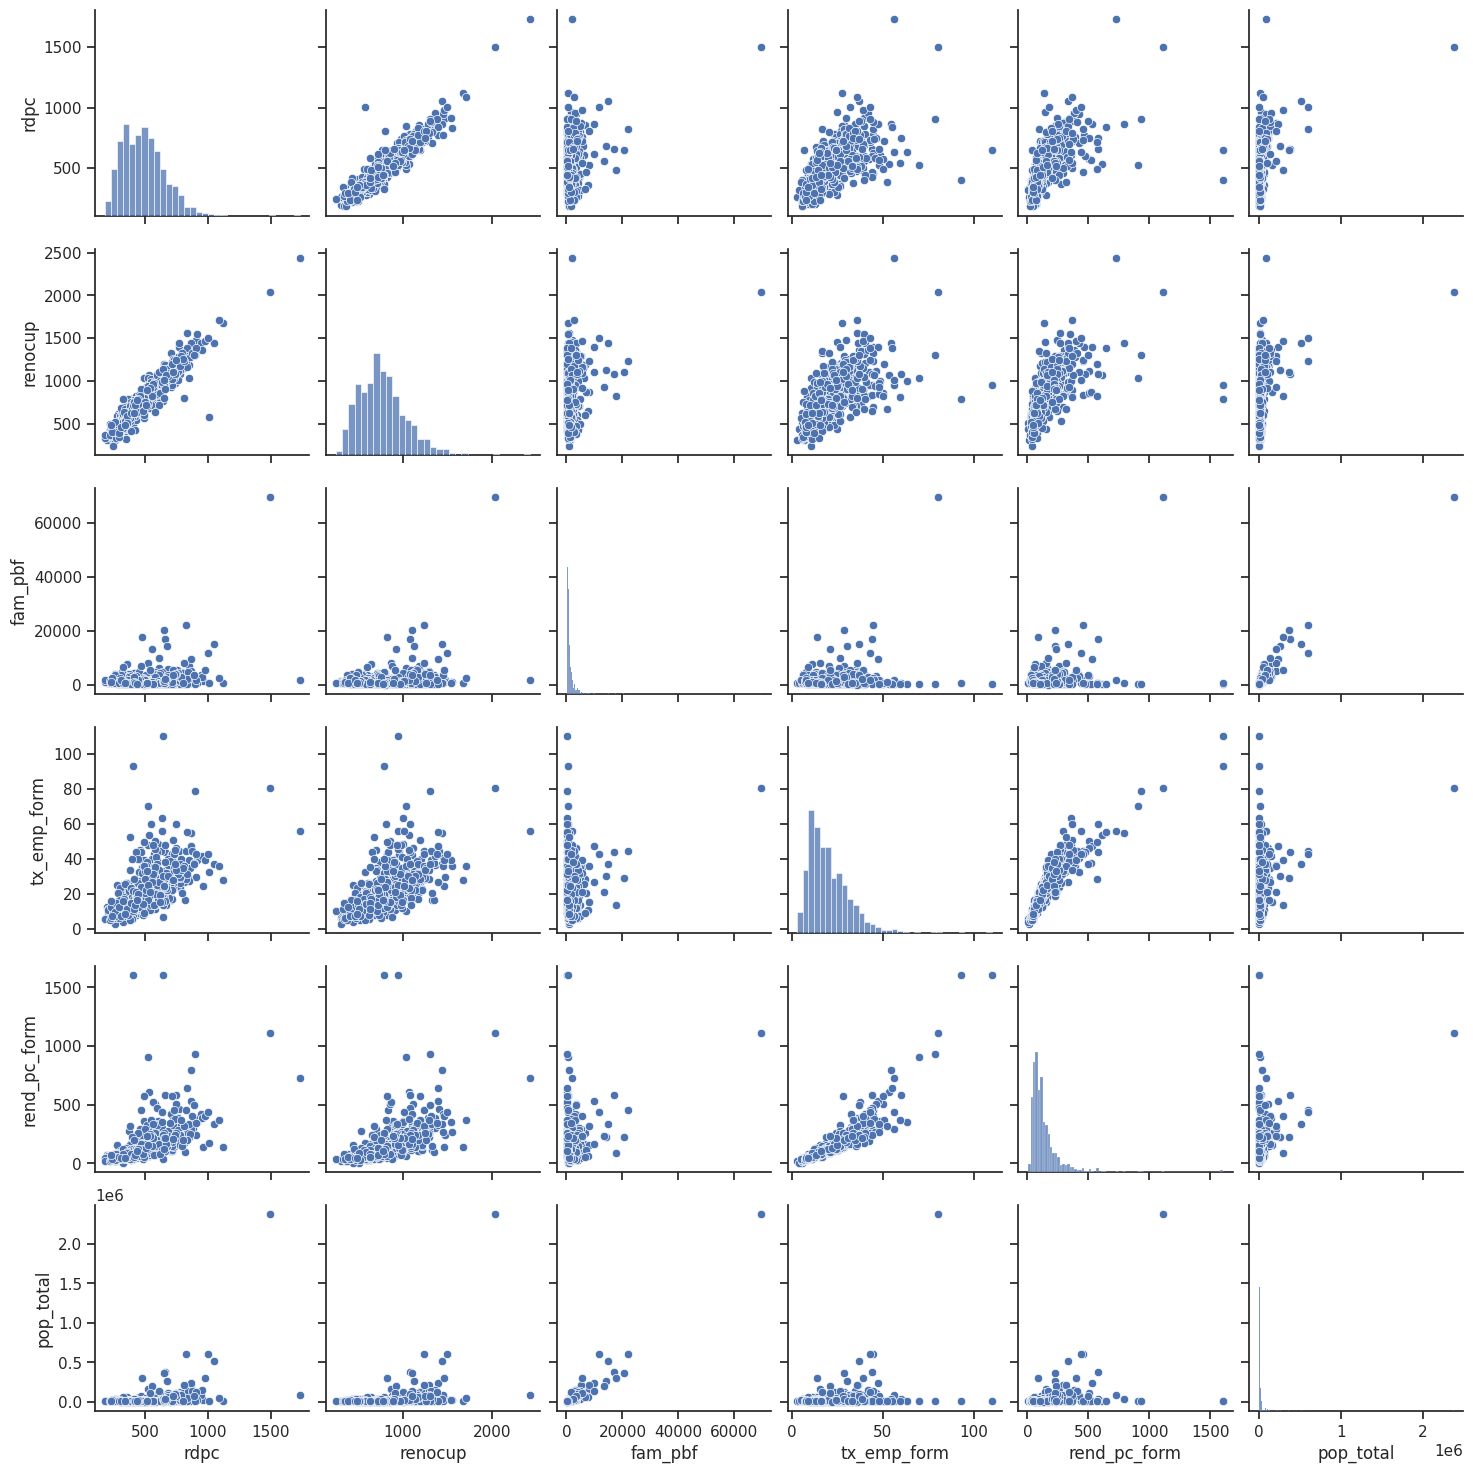

In [12]:
# correlação das variáveis
sns.set(style='ticks')
sns.pairplot(df2);

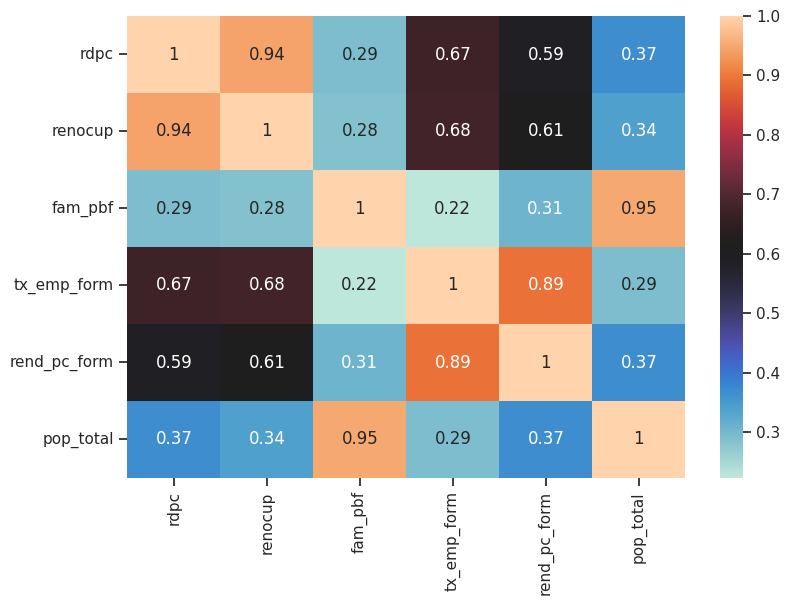

In [18]:
# correlacao das variaveis usando o mapa de calor
plt.figure(figsize=(9,6))
ax=sns.heatmap(df2.corr(),
               annot=True,
               cmap='icefire',
               cbar_kws={"orientation":"vertical"})

### Aplicando PCA nas variáveis

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [21]:
pca=PCA()
resultado_pca=pca.fit_transform(scale(df2))
resultado=pd.DataFrame({'cp1':resultado_pca[:,0],'cp2':resultado_pca[:,1],'cp3':resultado_pca[:,2],
                        'cp4':resultado_pca[:,3], 'cp5':resultado_pca[:,4], 'cp6':resultado_pca[:,5]})

In [22]:
# componentes principais
pca.components_

array([[ 0.45087825,  0.45036309,  0.30803856,  0.43997885,  0.43567647,
         0.33999817],
       [-0.21022975, -0.22770007,  0.64708015, -0.28483059, -0.19027521,
         0.60655608],
       [-0.50396412, -0.48484489,  0.01345333,  0.43108371,  0.56993659,
         0.01018501],
       [-0.05987524,  0.19065391, -0.01351821, -0.72302024,  0.65765046,
        -0.0679772 ],
       [ 0.58088697, -0.58466987, -0.38962821, -0.1262328 ,  0.11425963,
         0.37407398],
       [-0.396885  ,  0.36340532, -0.57812252,  0.02764041, -0.05995208,
         0.60978273]])

In [23]:
# calculando a variância dos componentes principais
pca.explained_variance_ratio_

array([0.60761056, 0.25136361, 0.10819631, 0.01602354, 0.01028847,
       0.0065175 ])

In [25]:
# variância explicada acumulada
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([ 60.76,  85.9 ,  96.72,  98.32,  99.35, 100.  ])

In [27]:
tot = sum(pca.explained_variance_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [28]:
cp =['CP'+str(i+1) for i in range(len(pca.components_))]
df = pd.DataFrame({'cp': cp, 'var_exp': var_exp, 'cum_var_exp': cum_var_exp})

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['cp'], y=df['var_exp'], marker_color='purple', name='var_exp'))
fig.add_trace(go.Scatter(x=df['cp'], y=df['cum_var_exp'], mode='lines', line=dict(color='black'), name='cum_var_exp'))
fig.update_layout(
    title='Análise da variância explicada',
    xaxis=dict(title='cp'),
    yaxis=dict(title='% variância explicada'),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)
fig.show()

Por meio dos cálculos de variância explicada, é possível observar que a CP1 e a CP2 atingem um valor de variância explicada acumulada maior maior  que 80% (85%), o que nos leva a entender que as duas primeiras variáveis já são suficientes.

## Correlação das variáveis com os componentes principais

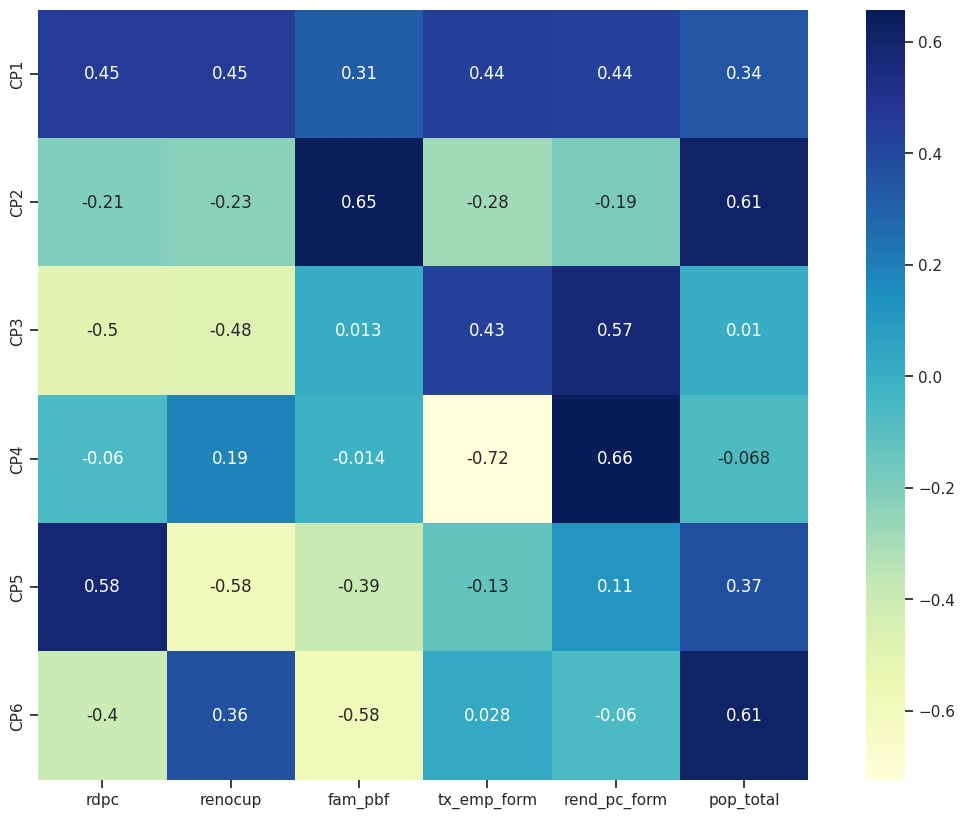

In [40]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(pca.components_,
                 annot=True,
                 cmap='YlGnBu',
                 yticklabels=[ "CP"+str(X) for X in range(1,pca.n_components_+1)],
                 xticklabels=list(df2.columns),
                 cbar_kws={"orientation": "vertical"})
ax.set_aspect("equal")

Interpretação

 Y1: Pontuações mais altas indicam áreas com maior influência das variáveis 'rdpc', 'renocup', 'tx_emp_form', 'rend_pc_form' e 'pop_total'. Isso sugere uma região com um nível mais alto de atividade econômica e uma maior concentração populacional.

Y2: Pontuações mais altas indicam áreas com uma maior presença de programas sociais de assistência, enquanto outras variáveis têm contribuições menores.

Y3: Pontuações mais altas indicam uma maior taxa de emprego formal ('tx_emp_form') e renda per capita formal ('rend_pc_form'), sugerindo uma economia mais formalizada e desenvolvida. A renda ocupada ('renocup') também contribui, embora em menor medida.

Y4: Pontuações mais altas indicam uma população total ('pop_total') mais numerosa e uma maior renda ocupada ('renocup'), sugerindo uma distribuição mais equitativa da renda per capita.

Y5: Pontuações mais altas indicam uma menor taxa de emprego formal ('tx_emp_form') e uma maior renda per capita formal ('rend_pc_form'), sugerindo uma maior presença de emprego informal e uma economia mais informalizada. A renda ocupada ('renocup') também contribui, mas em menor valor.

Y6: Pontuações mais altas indicam uma maior ocupação de renda e uma população mais numerosa, sugerindo áreas com maior atividade econômica e uma maior concentração populacional. As outras variáveis têm contribuições menores.

In [35]:
df2.columns

Index(['rdpc', 'renocup', 'fam_pbf', 'tx_emp_form', 'rend_pc_form',
       'pop_total'],
      dtype='object')

In [36]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=resultado_pca[:, 0], y=resultado_pca[:, 1], mode='markers', marker=dict(color='blue', line=dict(color='black', width=0.7))))

fig.update_layout(
    title='Análise de Componentes Principais',
    xaxis=dict(title='CP1'),
    yaxis=dict(title='CP2'),
    showlegend=False,
    template='plotly_white'
)

fig.show()


In [37]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(cumulative_variance)+1), y=cumulative_variance, mode='lines', line=dict(color='blue')))

fig.update_layout(
    title='Variância Explicada Acumulada',
    xaxis=dict(title='Número de componentes'),
    yaxis=dict(title='Variância explicada acumulada'),
    showlegend=False,
    template='plotly_white'
)

fig.show()


O gráfico mostra que duas componentes principais capturam a maior parte da variabilidade presente nos dados originais.